# Intensive Care in Germany

## Data Source

[DIVI-Intensivregister](https://www.intensivregister.de/) monitors the ICU capacities of 1,300 hospitals in Germany.

## Setup

In [1]:
# standard library
import datetime
import math

In [2]:
# third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Date this Notebook was run

In [3]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2021-07-22'

In [4]:
# style like ggplot in R
plt.style.use('ggplot')

In [5]:
# Avoid cutting off part of the axis labels, see:
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.rcParams.update({'figure.autolayout': True})

## Get Data

In [6]:
timeline_data = "https://diviexchange.blob.core.windows.net/%24web/bundesland-zeitreihe.csv"

In [7]:
timeline_df = pd.read_csv(timeline_data)

In [8]:
timeline_df.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
8327,2021-07-22T12:15:00+02:00,BRANDENBURG,48,5,508,106,357,96,22,25,3,15,5
8328,2021-07-22T12:15:00+02:00,SACHSEN_ANHALT,41,3,623,116,335,96,50,24,4,10,3
8329,2021-07-22T12:15:00+02:00,DEUTSCHLAND,1313,350,19025,3651,10209,3276,1394,647,211,306,149


## Rename Columns

### Convert datatype of date column

In [9]:
timeline_df["Datum"] = timeline_df["Datum"].str[:10]
timeline_df.head()

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
0,2020-03-20,RHEINLAND_PFALZ,15,14,48,112,0,0,0,10,3,2,0
1,2020-03-20,HAMBURG,11,6,24,115,0,0,0,9,0,2,0
2,2020-03-20,SACHSEN,20,3,44,272,0,0,0,16,2,2,0
3,2020-03-20,NIEDERSACHSEN,25,17,43,236,0,0,0,20,3,2,0
4,2020-03-20,BADEN_WUERTTEMBERG,31,35,39,330,0,0,0,20,7,3,1


In [10]:
timeline_df.iloc[ : , [0]] = timeline_df.iloc[ : , [0]].apply(pd.to_datetime)

In [11]:
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8330 entries, 0 to 8329
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Datum                                       8330 non-null   datetime64[ns]
 1   Bundesland                                  8330 non-null   object        
 2   Anzahl_Meldebereiche_Erwachsene             8330 non-null   int64         
 3   Aktuelle_COVID_Faelle_Erwachsene_ITS        8330 non-null   int64         
 4   Belegte_Intensivbetten_Erwachsene           8330 non-null   int64         
 5   Freie_Intensivbetten_Erwachsene             8330 non-null   int64         
 6   7_Tage_Notfallreserve_Erwachsene            8330 non-null   int64         
 7   Freie_IV_Kapazitaeten_Gesamt                8330 non-null   int64         
 8   Freie_IV_Kapazitaeten_Davon_COVID           8330 non-null   int64         
 9   Betriebs

In [12]:
federal_level = timeline_df[timeline_df.Bundesland=='DEUTSCHLAND']
federal_level.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
8295,2021-07-20,DEUTSCHLAND,1318,357,19102,3631,10284,3278,1372,640,209,317,152
8312,2021-07-21,DEUTSCHLAND,1315,353,19140,3554,10233,3253,1333,641,213,312,149
8329,2021-07-22,DEUTSCHLAND,1313,350,19025,3651,10209,3276,1394,647,211,306,149


## Used Beds (Adults)

In [13]:
used_beds = federal_level.loc[ : , ['Datum', 'Belegte_Intensivbetten_Erwachsene']]
used_beds.columns = ['date', 'ICU beds in use (adults)']
used_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 16 to 8329
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      490 non-null    datetime64[ns]
 1   ICU beds in use (adults)  490 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [14]:
used_beds.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

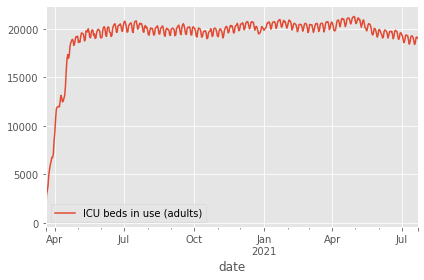

In [15]:
used_beds.plot()

## Covid-19 patients in ICU

In [16]:
icu = federal_level.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]

In [17]:
icu.columns = ['date', 'Covid-19 cases in ICU']
icu.set_index('date', inplace=True)
icu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2020-03-20 to 2021-07-22
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  490 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


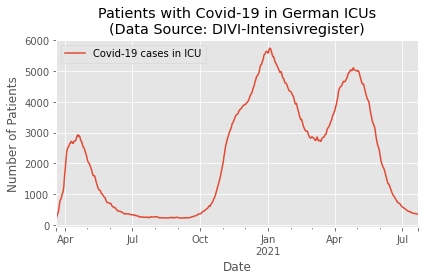

In [18]:
icu_cases = icu.plot(
    title='Patients with Covid-19 in German ICUs\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

In [19]:
fig = icu_cases.get_figure()
fig.savefig('img/covid-19-patients-in-icu-germany.png')

### Situation in North Rhine-Westphalia

NRW ist the state in Germany with the highest number of inhabitants.

In [20]:
nrw = timeline_df[timeline_df.Bundesland=='NORDRHEIN_WESTFALEN']
nrw.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
8309,2021-07-21,NORDRHEIN_WESTFALEN,316,72,4585,860,2416,739,343,164,56,74,22
8325,2021-07-22,NORDRHEIN_WESTFALEN,316,75,4519,935,2390,789,387,168,54,70,24


In [21]:
icu_nrw = nrw.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_nrw.columns = ['date', 'Covid-19 cases in ICU']
icu_nrw.set_index('date', inplace=True)
icu_nrw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2020-03-20 to 2021-07-22
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  490 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


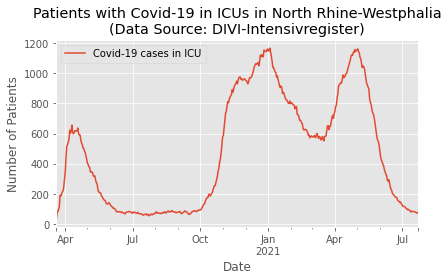

In [22]:
icu_cases_nrw = icu_nrw.plot(
    title='Patients with Covid-19 in ICUs in North Rhine-Westphalia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Rhineland-Palatinate

In [23]:
rlp = timeline_df[timeline_df.Bundesland=='RHEINLAND_PFALZ']
rlp.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
8296,2021-07-21,RHEINLAND_PFALZ,76,15,805,221,406,194,102,39,19,11,7
8313,2021-07-22,RHEINLAND_PFALZ,76,16,811,211,402,181,96,39,18,12,7


In [24]:
icu_rlp = rlp.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_rlp.columns = ['date', 'Covid-19 cases in ICU']
icu_rlp.set_index('date', inplace=True)
icu_rlp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2020-03-20 to 2021-07-22
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  490 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


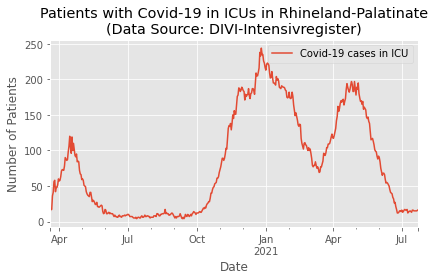

In [25]:
icu_cases_rlp = icu_rlp.plot(
    title='Patients with Covid-19 in ICUs in Rhineland-Palatinate\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Saxony

Saxonia had high case numbers during the pandemic.

In [26]:
saxonia = timeline_df[timeline_df.Bundesland=='SACHSEN']
saxonia.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
8299,2021-07-21,SACHSEN,79,16,1236,242,628,280,83,45,13,10,11
8315,2021-07-22,SACHSEN,79,15,1240,242,626,278,84,46,11,12,10


In [27]:
icu_saxonia = saxonia.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_saxonia.columns = ['date', 'Covid-19 cases in ICU']
icu_saxonia.set_index('date', inplace=True)
icu_saxonia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2020-03-20 to 2021-07-22
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  490 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


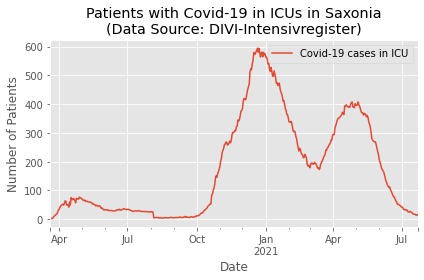

In [28]:
icu_cases_saxonia = icu_saxonia.plot(
    title='Patients with Covid-19 in ICUs in Saxonia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')